In [1]:
from pickle import load
from functools import partial
import healpy as hp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from chainconsumer import ChainConsumer

import src.forward_model as FM
import src.beam_functions as BF
import src.sky_models as SM
from anstey.generate import T_CMB
from src.spherical_harmonics import RealSphericalHarmonics, calc_spherical_harmonic_matrix
from src.nregions_models import pix_forward_model_pl, genopt_pix_forward_model_pl
from src.blockmat import BlockMatrix, BlockVector
RS = RealSphericalHarmonics()
from nregions_inference import nuarr
import nregions_inference as NRI

from chainconsumer import ChainConsumer
from emcee import EnsembleSampler

calc_spherical_harmonic_matrix npix, nalm : 3072 6


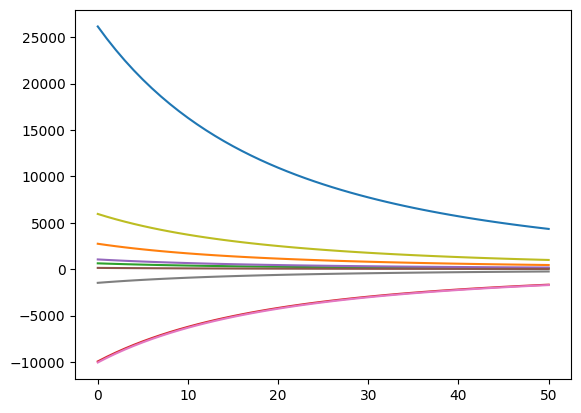

In [8]:
# Have a peek at the alm of the GSMA sky.
lmax  = 32
lmod  = 2
nside = 16
nuarr = NRI.nuarr
a = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmod, nside=nside, use_mat_Y=True)
a_sep = np.split(a, len(nuarr))
_=plt.plot(a_sep)

/Users/yordani/Documents/boosted_compass/matrix-observer/src/spherical_harmonics.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  almr[idxr_p] = almc[idxc]


Text(0, 0.5, 'Temp [K]')

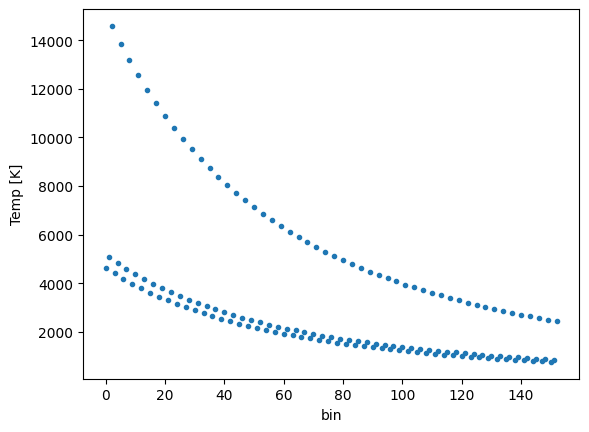

In [2]:
# Generate some mock data.
times = np.linspace(0, 6, 3)
lmax  = 32
nside = 16
dnoisy, noise_covar, mat_A, mat_Y, params = NRI.fiducial_obs(
    uniform_noise=True,
    unoise_K = 1.,
    times = times,
    Ntau = len(times),
    lmax = lmax,
    nside = nside
)
plt.plot(dnoisy.vector, '.')
plt.xlabel("bin")
plt.ylabel("Temp [K]")

In [3]:
# Test out the alm model.
FM.generate_alm_pl_forward_model(nuarr=NRI.nuarr, observation_mat=mat_A, Npoly=2, lmax=lmod)